In [1]:
# for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import pandas as pd
import numpy as np
import graphviz
import os
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preparation
from sklearn.model_selection import train_test_split

# Statistics
import scipy.stats as stats

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics.scorer import SCORERS

### classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Add the system path to the Graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading the data

Load Stack Overflow Survey data from 2017. Build out cleaning strategies to be tested.

[Stack Overflow Survey Data](https://insights.stackoverflow.com/survey)

In [3]:
df_schema = pd.read_csv('./data/survey_results_schema.csv')
df_schema.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
Column,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Question,Respondent ID number,Which of the following best describes you?,Do you program as a hobby or contribute to ope...,In which country do you currently live?,"Are you currently enrolled in a formal, degree...",Which of the following best describes your cur...,Which of the following best describes the high...,Which of the following best describes your mai...,How often do you work from home or remotely?,"In terms of the number of employees, how large...",Which of the following best describes the type...,How long has it been since you first learned h...,For how many years have you coded as part of y...,For how many years did you code as part of you...,Which of the following best describe you?,Which of the following best describes you as a...,For which of the following platforms do you de...,Which of the following descr

In [4]:
# this function will help us understand the different survey fields
def col_description(col_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            col_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == col_name]['QuestionText'])[0]
    print('{} : {}\n'.format(col_name, desc))
    return

In [5]:
df_results = pd.read_csv('./data/survey_results_public.csv',low_memory=False)
df_results.head()
df_results.shape

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

(51392, 154)

## Survey Summary

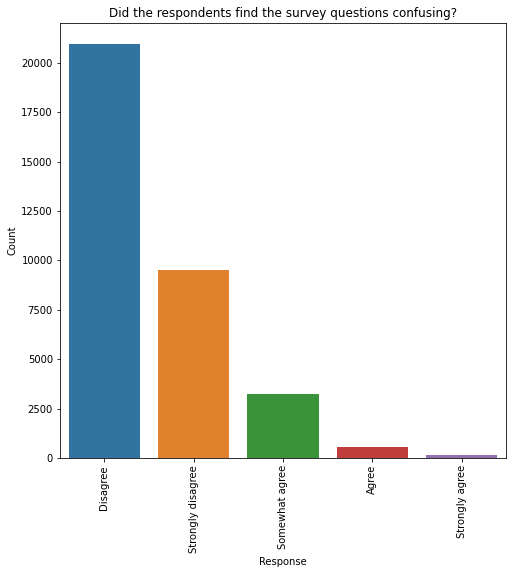

In [6]:
# how do the respondents feel about the survey?

plt.figure(figsize=(8,8))
ax = sns.countplot(x="QuestionsConfusing", data=df_results,
                   order=df_results['QuestionsConfusing'].dropna().value_counts().index)
ax.set(xlabel='Response',ylabel='Count',title='Did the respondents find the survey questions confusing?')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('./img/Did the respondents find the survey questions confusing.png')
plt.show();

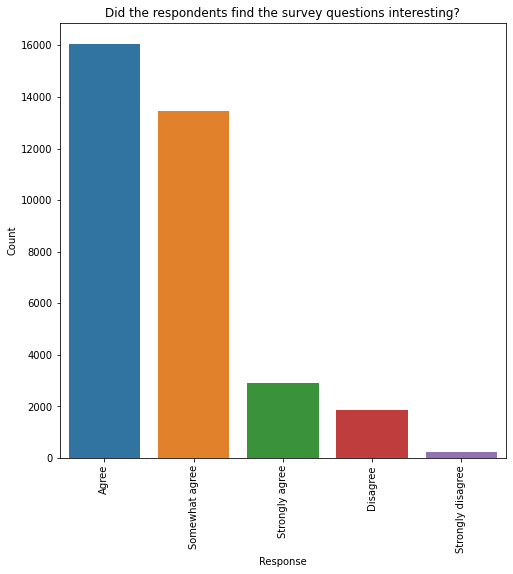

In [7]:
# how did the respondents find the survey?

plt.figure(figsize=(8,8))
ax = sns.countplot(x="QuestionsInteresting", data=df_results,
                   order=df_results['QuestionsInteresting'].value_counts().index)
ax.set(xlabel='Response',ylabel='Count',title='Did the respondents find the survey questions interesting?')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('./img/Did the respondents find the survey questions interesting.png')
plt.show();

We find that more than 20,000 of the respondents have felt that the survey was somewhat easy. A quick look at the columns indicates the reason why people might have thought the survey was easy. Fear of AI, Ethics related questions, lot of questions dealing with tools might be some of the reasons why people have responded this. A fraction of people have also indicated that the survey was very difficult.

In [8]:
df_results.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [9]:
# Columns to keep after careful consideration of which columns will help me answer questions.
subset = ['HomeRemote',
          'Country',
          'JobSatisfaction',
          'CompanySize',
          'CompanyType',
          'JobSecurity',
          'SeriousWork',
          'HoursPerWeek',
          'DifficultCommunication',
          'CollaborateRemote',
          'EmploymentStatus'
         ]
df_subset = df_results[subset]
df_subset.head()

,HomeRemote,Country,JobSatisfaction,CompanySize,CompanyType,JobSecurity,SeriousWork,HoursPerWeek,DifficultCommunication,CollaborateRemote,EmploymentStatus
0,NaN,United States,NaN,NaN,NaN,Strongly agree,Strongly agree,0.0,NaN,NaN,"Not employed, and not looking for work"
1,"More than half, but not all, the time",United Kingdom,NaN,20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,Disagree,Strongly disagree,Employed part-time
2,"Less than half the time, but at least one day ...",United Kingdom,9.0,"10,000 or more employees",Publicly-traded corporation,Agree,Agree,NaN,Disagree,Somewhat agree,Employed full-time
3,"Less than half the time, but at least one day ...",United States,3.0,"10,000 or more employees",Non-profit/non-governmental organization or pr...,Somewhat agree,Strongly agree,5.0,Disagree,Somewhat agree,Employed full-time
4,Never,Switzerland,8.0,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,NaN,NaN,Employed full-time


In [10]:
df_q1 = df_subset.copy()
df_q1.shape

(51392, 11)

# _1. Where are do work from home developers live?_

+ This question will be answered by:
    + Look at HomeRemote and Country column
    + Calculate the proporition of work from home respondents for each country
    + Create a bar plot to show the results

### _Health Check and Data Preparation for Question 1_
+ Clean data
    + Handle missing values
        + Remove missing values in "Country" and "HomeRemote"
+ Create a categorical column "WorkFromHome" from "HomeRemote" by categorizing each unique value into Yes and No.
    + Yes:
            "More than half, but not all, the time",
            "Less than half the time, but at least one day each week", 
            "All or almost all the time (I'm full-time remote)",
            "About half the time"
    + No:
            "Never", 
            "A few days each month",
            "It's complicated"

In [11]:
print(f'The 2017 survey had {str(df_q1.shape[0])} respondents and {str(df_q1.shape[1])} variables')

The 2017 survey had 51392 respondents and 11 variables


In [12]:
print(len(df_q1), 'rows before dropping na')
test = df_q1.dropna()
print(len(test), 'rows after dropping na')

51392 rows before dropping na
5911 rows after dropping na


In [13]:
# We assess the proportion of missing values in each column
df_q1.isnull().mean().round(4).sort_values(ascending = False)

HoursPerWeek              0.5992
CollaborateRemote         0.4268
DifficultCommunication    0.4233
SeriousWork               0.3965
JobSecurity               0.3921
CompanyType               0.2446
CompanySize               0.2426
JobSatisfaction           0.2144
HomeRemote                0.1437
EmploymentStatus          0.0000
Country                   0.0000
dtype: float64

+ There is a lot of missing data. In order to address this, I am going to test how dropping the na values would affect the amount of data?
1. No missing values in "Country"
1. "HoursPerWeek" make up 60% of missing values

In [14]:
# Remove missing values in "Country" and "HomeRemote"
df_q1.dropna(axis=0, subset=['Country', "HomeRemote"], inplace=True)
# We assess the proportion of missing values in Country and HomeRemote after drop
df_q1.isnull().mean().round(4).sort_values(ascending = False)

HoursPerWeek              0.5936
CollaborateRemote         0.4096
DifficultCommunication    0.4068
SeriousWork               0.3842
JobSecurity               0.3800
CompanyType               0.1188
CompanySize               0.1168
JobSatisfaction           0.0837
EmploymentStatus          0.0000
Country                   0.0000
HomeRemote                0.0000
dtype: float64

In [15]:
df_q1['HomeRemote'].unique()

array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       "It's complicated", 'A few days each month', 'About half the time'],
      dtype=object)

In [16]:
Search_for_These_values = ['Never', 'A few days each month', "It's complicated"] #creating list

pattern = '|'.join(Search_for_These_values)     # joining list for comparision
# print(pattern)

IScritical = df_q1['HomeRemote'].str.contains(pattern)

df_q1['WorkFromHome']='NO'
# df.loc[df['HomeRemote'].str.contains(pattern), 'WorkFromHome'] = 'NO'
df_q1['WorkFromHome'][IScritical]='NO'
df_q1['WorkFromHome'][~IScritical]='YES'

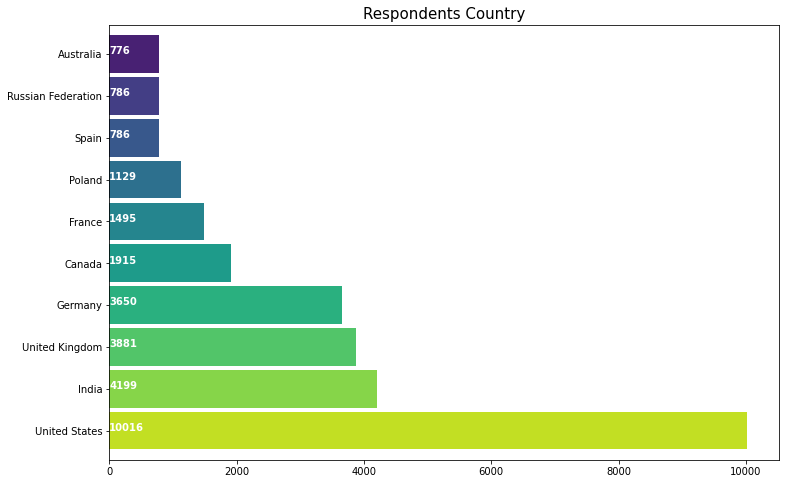

In [17]:
# Which are the countries from which more response was received? (top countries with largest number of respondents)
plt.figure(figsize=(12,8))
df_q1['Country'].value_counts()[:10].plot.barh(width=0.9,color=sns.color_palette('viridis_r',10))
plt.title('Respondents Country',size=15)
for i,v in enumerate(df_q1['Country'].value_counts()[:10].values):
    plt.text(0.5,i,v,fontsize=10,color='white',weight='bold')
plt.savefig('./img/Respondents Country.png')
plt.show();

+ We find that large number of respondents are from US followed by India and United Kingdom.The difference between each of the countries is about ~7000 respondents. Only after Canada we find that there is a difference in terms of hundreds.

In [18]:
country_count = df_q1['Country'].value_counts()
country_count

United States         10016
India                  4199
United Kingdom         3881
Germany                3650
Canada                 1915
                      ...  
Tadjikistan               1
Anguilla                  1
Vatican City State        1
Eritrea                   1
Saint Lucia               1
Name: Country, Length: 188, dtype: int64

In [19]:
# Drop the rows if the country has less than 400 respondents
country_count = country_count[country_count >= 400]
country_keep = list(country_count.index)
country_keep

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Poland',
 'Spain',
 'Russian Federation',
 'Australia',
 'Netherlands',
 'Brazil',
 'Italy',
 'Sweden',
 'Switzerland',
 'Israel',
 'Romania',
 'Iran',
 'Austria']

In [20]:
df_q1 = df_q1[df_q1['Country'].isin(country_keep)]
df_q1.shape

(33600, 12)

In [21]:
yes = ["More than half, but not all, the time",
       "Less than half the time, but at least one day each week", 
       "All or almost all the time (I'm full-time remote)",
       "About half the time"]

df_q1['WorkFromHome'] =  df_q1['HomeRemote'].isin(yes)
df_q1.head()

,HomeRemote,Country,JobSatisfaction,CompanySize,CompanyType,JobSecurity,SeriousWork,HoursPerWeek,DifficultCommunication,CollaborateRemote,EmploymentStatus,WorkFromHome
1,"More than half, but not all, the time",United Kingdom,NaN,20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,Disagree,Strongly disagree,Employed part-time,True
2,"Less than half the time, but at least one day ...",United Kingdom,9.0,"10,000 or more employees",Publicly-traded corporation,Agree,Agree,NaN,Disagree,Somewhat agree,Employed full-time,True
3,"Less than half the time, but at least one day ...",United States,3.0,"10,000 or more employees",Non-profit/non-governmental organization or pr...,Somewhat agree,Strongly agree,5.0,Disagree,Somewhat agree,Employed full-time,True
4,Never,Switzerland,8.0,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,NaN,NaN,Employed full-time,False
6,"Less than half the time, but at least one day ...",United States,6.0,20 to 99 employees,Government agency or public school/university,NaN,NaN,1.0,NaN,NaN,Employed full-time,True


### Discuss Question 1

+ Here we calculate the percentage of respondents who work from home for each country. The findings are sorted in ascending order which will show the countries with highest percentage of work from home deevelopers. 

In [24]:
country_wfh = df_q1.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = True).round(2)
country_wfh

Country
Sweden                0.17
Switzerland           0.19
Austria               0.21
Germany               0.22
United Kingdom        0.23
France                0.23
Netherlands           0.24
Israel                0.24
Spain                 0.24
Canada                0.25
Romania               0.26
Australia             0.28
Poland                0.28
Brazil                0.30
Italy                 0.30
India                 0.31
United States         0.31
Russian Federation    0.37
Iran                  0.51
Name: WorkFromHome, dtype: float64

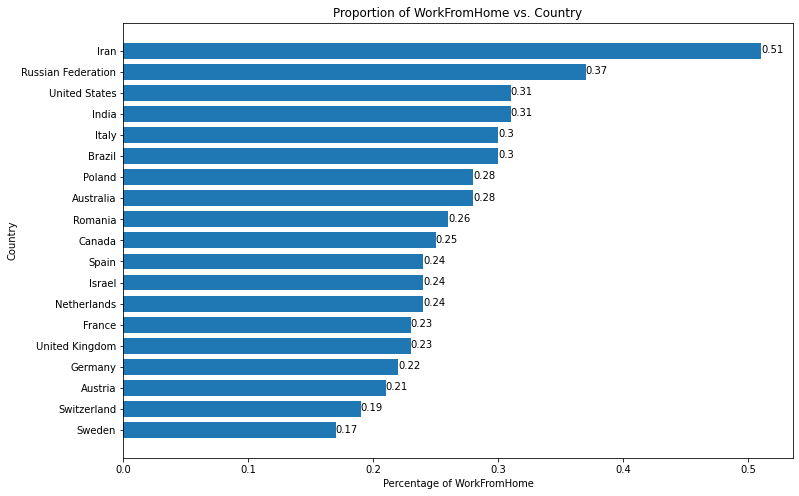

In [25]:
x = country_wfh.index
y = country_wfh

fig, ax = plt.subplots(figsize=(12,8))

width = .75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

ax.barh(ind, y, width)

ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)

plt.title('Proportion of WorkFromHome vs. Country')
plt.xlabel('Percentage of WorkFromHome')
plt.ylabel('Country')   

for i, v in enumerate(y):
    ax.text(v, i-.10, str(v))
plt.savefig('./img/Proportion of WorkFromHome vs. Country.png')

plt.show();

In [26]:
country_reset_index = country_wfh.reset_index()

In [27]:
country_mean = country_reset_index['WorkFromHome'].mean() 
print(f'Proportion of developers that work from home in all countries above {100 * country_mean:.2f}%')

Proportion of developers that work from home in all countries above 27.05%


In [28]:
country_reset_index[country_reset_index['WorkFromHome'] >= 0.30]

,Country,WorkFromHome
13,Brazil,0.30
14,Italy,0.30
15,India,0.31
16,United States,0.31
17,Russian Federation,0.37
18,Iran,0.51


### Results for findings
+ Above are the top 6 countries that prefer work from home.

# _2. Are developers that work from home satisfied with their job?_

+ This question will be answered by:
    + Taking a look at WorkFromHome and JobSatisfaction columns
    + Perform different testing for working from home and not working from home and how it relates to job satisfaction.

### Health Check and Data Preparation for Question 2

+ Data will be prepared
    + We will be using the `WorkFromHome` created column from question 1 in this analysis.
+ Handle missing values
    + There are `2764` missing values for `JobSatisfaction` therefore, dropping the missing values in this column would be the best option for this analysis because the analysis will be based on `JobSatisfaction`.

In [29]:
df_js = df_q1.copy()
df_js.isna().sum()

HomeRemote                    0
Country                       0
JobSatisfaction            2764
CompanySize                3575
CompanyType                3647
JobSecurity               12615
SeriousWork               12760
HoursPerWeek              20269
DifficultCommunication    13438
CollaborateRemote         13548
EmploymentStatus              0
WorkFromHome                  0
dtype: int64

In [30]:
# drop rows with missing values in JobSatisfaction
df_js = df_js.dropna(subset=['JobSatisfaction'])
df_js.describe()

,JobSatisfaction,HoursPerWeek
count,30836.000000,12314.000000
mean,6.988066,3.277164
std,2.157310,6.825284
min,0.000000,0.000000
25%,6.000000,0.000000
50%,7.000000,1.000000
75%,8.000000,3.000000
max,10.000000,40.000000


In [31]:
wfh_dev = len(df_js[df_js['WorkFromHome'] == True])
print(f'Number of developers that work from home: {wfh_dev}')

Number of developers that work from home: 8203


In [32]:
non_wfh_dev = len(df_js[df_js['WorkFromHome'] == False])
print(f'Number of developers that do not work from home: {non_wfh_dev}')

Number of developers that do not work from home: 22633


### Discuss Question 2
`Inferential Statistics`

+ Our goal here is to summarize a sample of the data to infer or draw conculusions about the population from which the sample is drawn:
    + Hypothesis testing
        + This will tell us how extreme the observed result is compared to what random chance might produce, and it helps us make decisions on that basis.
        + `A/B testing`
        + `Null Hypothesis`
        + `Alternative Hypothesis`

# T-test:  Hypothesis Testing

## A/B Paired Testing: Compare Means: Simulation

In [33]:
new_df = df_js[['WorkFromHome','JobSatisfaction']]
new_df.shape
new_df.head()

(30836, 2)

,WorkFromHome,JobSatisfaction
2,True,9.0
3,True,3.0
4,False,8.0
6,True,6.0
7,True,7.0


In [34]:
def swap(x):
    if(np.random.random()>0.5):
        return [x[1],x[0]]
    else:
        return [x[0],x[1]]
    
def shuffle_data(data):
    shuffled_df = data.apply(swap, axis=1, result_type='expand')
    mean_diff =(shuffled_df[shuffled_df.columns[1]].mean()-
     shuffled_df[shuffled_df.columns[0]].mean())
    return mean_diff

In [35]:
new_df.apply(swap, axis=1, result_type='expand')

,0,1
2,True,9
3,3,True
4,False,8
6,6,True
7,7,True
...,...,...
51385,7,False
51386,4,False
51387,False,3
51389,10,True


## Generate Bootstrap Samples
+ We have a small size samples of `n` observations from two different distributions
+ I will generate Bootstrap samples with replacement with n=1000

In [36]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df_js.shape[0]
for _ in range(10000):
    b_samp     = df_js.sample(size, replace=True)
    js_wfh     = b_samp.query('WorkFromHome == True')['JobSatisfaction'].mean()
    js_not_wfh = b_samp.query('WorkFromHome == False')['JobSatisfaction'].mean()
    diffs.append(js_wfh - js_not_wfh)

### Test the difference for normality

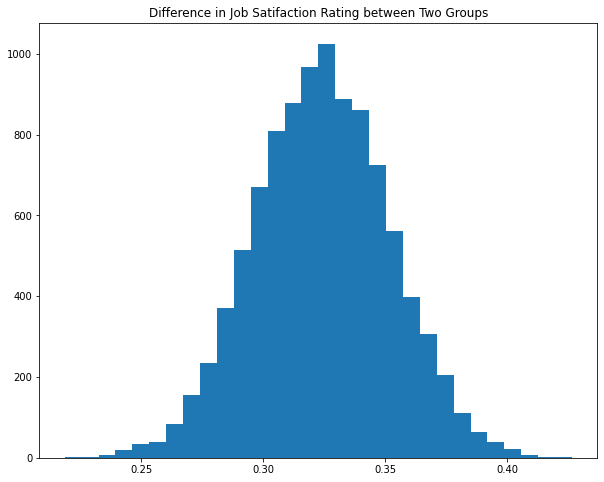

In [37]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.figure(figsize=[10,8])
plt.hist(diffs, bins=30,)
plt.title('Difference in Job Satifaction Rating between Two Groups')
plt.savefig('./img/Difference in Job Satifaction Rating between Two Groups.png')
plt.show();

In [38]:
np.percentile(diffs, 0.05), np.percentile(diffs, 99.95)

(0.23487038480042477, 0.41224185295088683)

In [39]:
diffs.mean()

0.3240637544771099

In [40]:
# Calculate the observed difference on average Job Satisfaction rating between the two groups
js_wfh = df_js.query('WorkFromHome == 1')['JobSatisfaction'].mean()
js_not_wfh = df_js.query('WorkFromHome == 0')['JobSatisfaction'].mean()
obs_diff = js_wfh - js_not_wfh

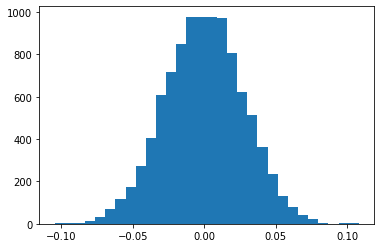

In [41]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals, bins = 30)
plt.savefig('./img/Simulate distribution under the null hypothesis.png')
plt.show();

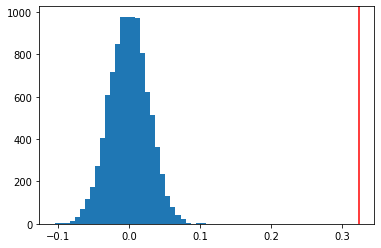

In [42]:
# lets visualize what this could look like
# a histogram of the null distribution and the observed mean of the difference is generated below to show the A/B test results.
# Plot observed statistic with the null distibution
plt.hist(null_vals, bins=30)
plt.axvline(obs_diff, c='red')
plt.savefig('./img/histogram of the null distribution and the observed mean of the difference.png')
plt.show();

In [43]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0

### Results for findings

+ Since p-value is almost equal to 0, the null hypothesis can be rejected. It can be concluded that the average Job Satisfaction Rating of work from home employees is significantly higher than that of non work from home employees.

## One Sample One-Sided `t`-Test

In [44]:
# two-sided test for the null hypothesis that the expected value
# (mean) of a sample of independent observations `a` is equal to the given
# population mean, `popmean`
stats.ttest_1samp (df_js["JobSatisfaction"], popmean = 7.0)

Ttest_1sampResult(statistic=-0.9714184320162874, pvalue=0.33134757341238685)

In [45]:
# alpha = 0.5: 95% confidence interval
def one_tailed_t_test(data, mu, alternative="less than", alpha=0.05):
    # one-tailed, less than 130

    results = stats.ttest_1samp(data, mu)
    print ("t = {0:5.4f}  df = {1}  p-value = {2:10.9f}".
           format(results[0], str(data.shape[0]-1), results[1]))
    
    if re.search("less than", alternative):
        if (results[0] < 0) & (results[1]/2 < alpha):
            print ("reject null hypothesis, mean is less than {}".format(mu))
        else:
            print ("fail to reject null hypothesis, mean is greater than {}".format(mu))
            print ("sample estimate: \n\t mean of data: {}".format(data.mean(axis=0)))
    elif re.search ("greater", alternative):
        if (results[0] > 0) & (results[1]/2 < alpha):
            print ("reject null hypothesis, mean is greater than {}".format(mu) )
        else:
            print("fail to reject null hypothesis, mean is less than {}".format(mu))
            print ("sample estimate: \n\t mean of data: {}".format(data.mean(axis=0)))
    else:
        print ("invalid argument for alternative: {}".format(alternative))

In [46]:
one_tailed_t_test(data=df_js["JobSatisfaction"], mu=7, alternative="less than")

t = -0.9714  df = 30835  p-value = 0.331347573
fail to reject null hypothesis, mean is greater than 7
sample estimate: 
	 mean of data: 6.988065897003502


## Ansari-Bradley Test: Equality of Variances

In [47]:
wfh_dev = df_js[df_js['WorkFromHome'] == True]
non_wfh_dev = df_js[df_js['WorkFromHome'] == False]

print ("WorkFromHome Developers Variance: {0:4.3}".format(wfh_dev["JobSatisfaction"].var(axis=0)))
print ("Non WorkFromHome Developers Variance: {0:4.3f}".format(non_wfh_dev["JobSatisfaction"].var(axis=0)))

WorkFromHome Developers Variance: 4.59
Non WorkFromHome Developers Variance: 4.648


+ Check the assumptions for applying the Ansari-Bradley Test:
    - Test for normality of `JobSatisfaction` distributions for each `WorkFromHome Developer`
    - Use Shapiro-Wilk test for normality:
        * If the sample is _not_ normally distributed (i.e., the Null Hypothesis should be rejected because $p$-value < 0.05) then a _non-parametric_ test, such as Ansari-Bradley Test, should be applied

In [48]:
# stats.shapiro(wfh_dev["JobSatisfaction"])
print("Testing wfh_dev sample with Shapiro-Wilk test: ")
statistic, pvalue = stats.shapiro(wfh_dev["JobSatisfaction"])
print("\t Test Statistic: ", statistic, "\n\t p-value: ", pvalue)

Testing wfh_dev sample with Shapiro-Wilk test: 
	 Test Statistic:  0.9181221127510071 
	 p-value:  0.0


In [49]:
# stats.shapiro(non_wfh_dev["JobSatisfaction"])
print("Testing non_wfh_dev sample with Shapiro-Wilk test: ")
statistic, pvalue = stats.shapiro(non_wfh_dev["JobSatisfaction"])
print("\t Test Statistic: ", statistic, "\n\t p-value: ", pvalue)

Testing non_wfh_dev sample with Shapiro-Wilk test: 
	 Test Statistic:  0.9261837601661682 
	 p-value:  0.0


In [50]:
print("Testing sample with Ansari test: ")
statistic, pvalue = stats.ansari(wfh_dev["JobSatisfaction"], non_wfh_dev["JobSatisfaction"])
print("\t Test Statistic: ", statistic, "\n\t p-value: ", pvalue)

Testing sample with Ansari test: 
	 Test Statistic:  61349639.0 
	 p-value:  1.556841208901288e-08


Results summary:
+ $𝒑$-value > 0.05: fail to reject the null hypothesis
+ According to this test, the results were not significant; 
+ Conclusion: the variances are equal

## Two-Sample T-Test: Equality of Means

In [51]:
t, p = stats.ttest_ind(wfh_dev['JobSatisfaction'], non_wfh_dev['JobSatisfaction'], equal_var=True)
print("ttest_ind: t = %g p = %g" % (t, p))

ttest_ind: t = 11.668 p = 2.16176e-31


In [52]:
jobTTest = stats.ttest_1samp (df_js["JobSatisfaction"], popmean = 2.5)
jobTTest.statistic

365.32196326212323

## Paired Samples T-Test

+ The paired sample t-test is also called ___dependent sample t-test___. 
+ It’s a univariate test that tests for a significant difference between two _related_ variables:
    + An example of this is if you where to collect the blood pressure for an individual _before_ and _after_ some treatment, condition, or time point.

The __hypothesis__ being test is:
> _Null hypothesis (H0)_: The mean difference between sample 1 and sample 2 is equal to 0.

> _Alternative hypothesis (HA)_: The mean difference between sample 1 and sample 2 is not equal to 0.

> If the $p$-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

### Paired Sample t-test Assumptions
+ The dependent variable (DV) must be _continuous_, i.e., measured on an interval or ratio scale
+ The DV should be approximately normally distributed: 
    - Use Shapiro-Wilk test for normality
    - Testing for normality needs to be conducted on the ___differences between the two conditions___, not the raw values of each condition itself
+ The paired sample t-test is robust to this violation. 
    - If there is a violation of normality, as long as it’s not in a major violation the test results can be considered valid
+ The DV should not contain any significant outliers
+ If any of these assumptions are violated, a different test should be used. 
    - An alternative to the paired sample t-test is the _Wilcoxon signed-rank_ Test.

# _3. What languages, frameworks, operating systems & databases were most popular?_

In [89]:
needed_col = ['ProgramHobby', 'HaveWorkedPlatform', 'Country', 'HaveWorkedLanguage', 
              'HaveWorkedFramework', 'HaveWorkedDatabase', 'DeveloperType']

df_3 = df_results[needed_col]
df_3.shape
df_3.head()

(51392, 7)

,ProgramHobby,HaveWorkedPlatform,Country,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,DeveloperType
0,"Yes, both",iOS,United States,Swift,NaN,NaN,NaN
1,"Yes, both",Amazon Web Services (AWS),United Kingdom,JavaScript; Python; Ruby; SQL,.NET Core,MySQL; SQLite,NaN
2,"Yes, both",NaN,United Kingdom,Java; PHP; Python,NaN,MySQL,Other
3,"Yes, both",Windows Desktop; Linux Desktop; Mac OS; Amazon...,United States,Matlab; Python; R; SQL,React,MongoDB; Redis; SQL Server; MySQL; SQLite,NaN
4,"Yes, I program as a hobby",NaN,Switzerland,NaN,NaN,NaN,Mobile developer; Graphics programming; Deskto...


In [90]:
df = df_3.copy()

In [91]:
# function for getting most used items and plotting them according to user count.

def get_most_used(column_name, title_name, k=7, figsize=(10,8)):
    '''
    INPUT:
        column_name - string - name of the column in which you would like to 
                        get the count of top 'k' frequently encountered words.
        title_name - string - title for the figure plotted.
        k - integer - total number of most popular words.
        figsize - tuple - size of figure to be plotted.
    OUTPUT:
        creates a horizontal bar plot.
    '''
    # Concatenate strings in the Series into one
    combined_string = df[column_name].str.cat(sep=';')

    # split() returns list of all the words in the string 
    split_it = combined_string.split(';') 
  
    # Pass the split_it list to instance of Counter class. 
    count = Counter(split_it) 
  
    # most_common() produces k frequently encountered input values and their respective counts. 
    most_occur = count.most_common(k)
    df_new = pd.DataFrame(most_occur, columns=['Items', 'User_Count'])
    df_new = df_new.drop_duplicates(keep=False)
    df_new = df_new.dropna()
    
    plt.figure(figsize=figsize)
    plt.barh(df_new.Items, df_new.User_Count)
    plt.xlabel('User Count', fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.title(title_name, fontsize=21)
    plt.gca().invert_yaxis();
    savepath = os.path.join('./img/', title_name + '.png')
    plt.savefig(savepath);

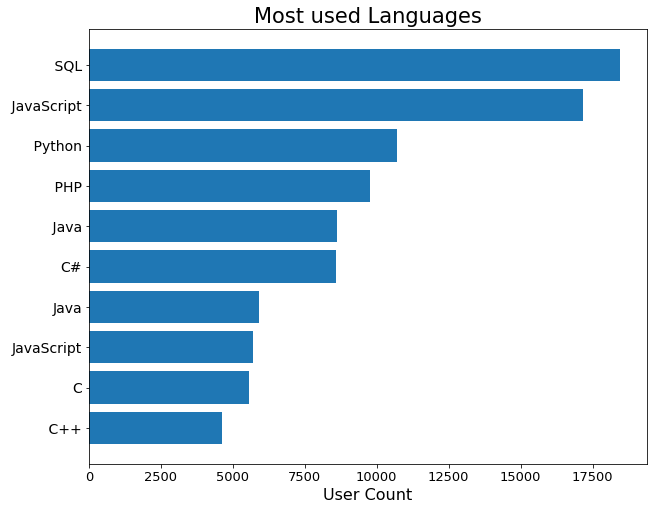

In [92]:
get_most_used('HaveWorkedLanguage', 'Most used Languages', 10)

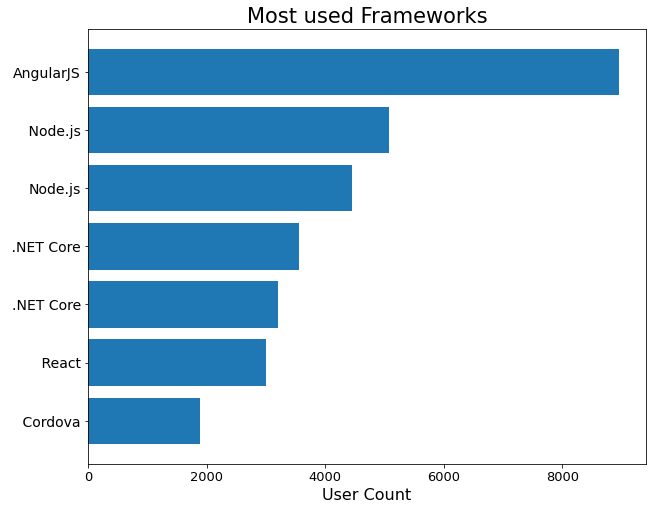

In [95]:
get_most_used('HaveWorkedFramework', 'Most used Frameworks')

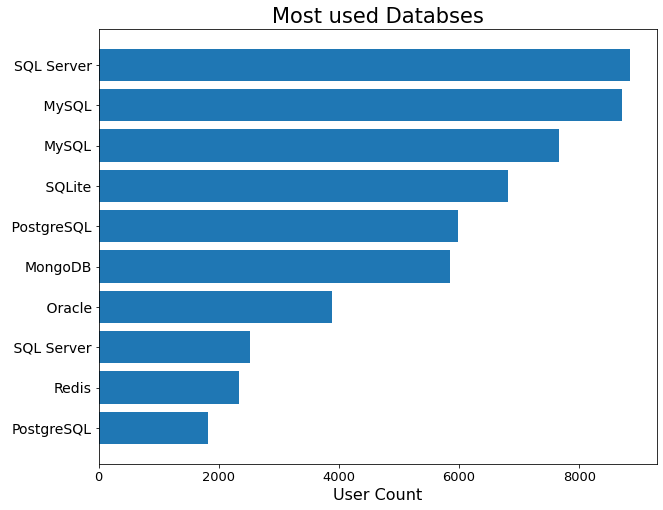

In [57]:
get_most_used(df_3, 'HaveWorkedDatabase', 'Most used Databses')

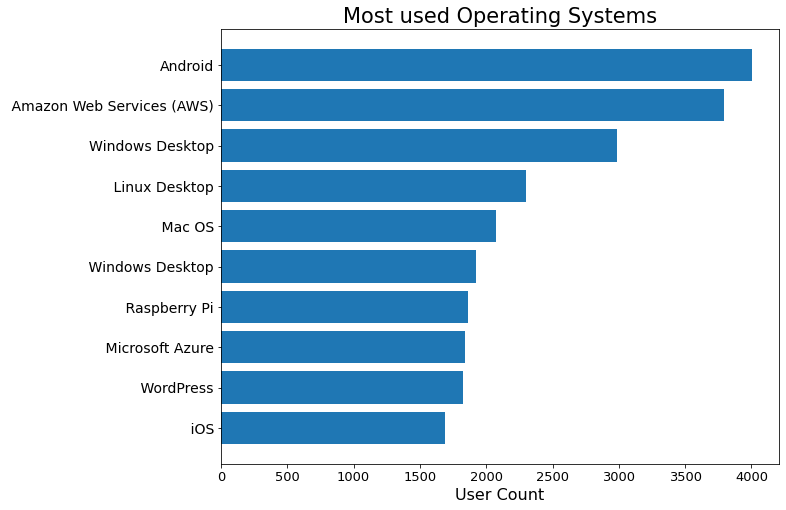

In [58]:
get_most_used(df_3.dropna(), 'HaveWorkedPlatform', 'Most used Operating Systems')

# 4. _What are the top 5 developer types?_

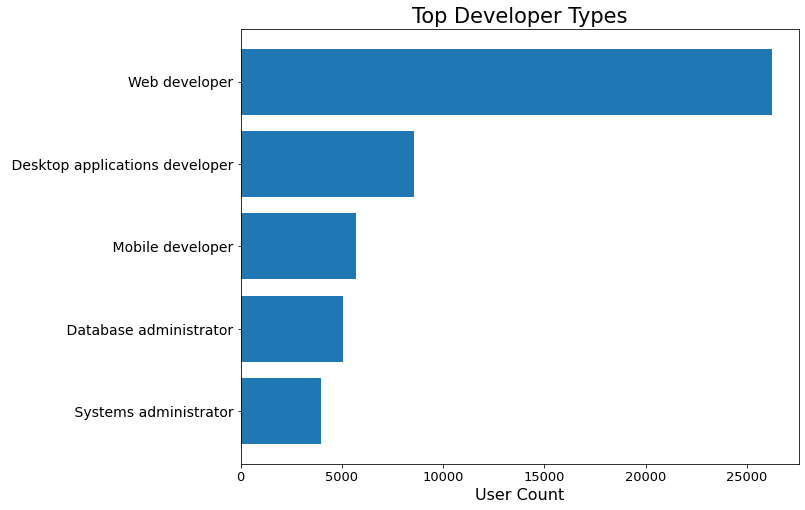

In [100]:
get_most_used('DeveloperType', 'Top Developer Types', 5)

# Hobby vs Career Satisfaction vs Employment Type

In [60]:
df_results.ProgramHobby.unique()

array(['Yes, both', 'Yes, I program as a hobby', 'No',
       'Yes, I contribute to open source projects'], dtype=object)

In [61]:
hobby_keep = ['Yes, both',
             'Yes, I program as a hobby',
             'Yes, I contribute to open source projects']

hobby_yes = df_results[df_results['ProgramHobby'].isin(hobby_keep)]

In [62]:
cols = ['EmploymentStatus','CareerSatisfaction']
# hob_yes = df_results[df_results['ProgramHobby']=='Yes, both']
col = sns.light_palette(color='green',as_cmap=True)
pd.crosstab(hobby_yes[cols[0]],hobby_yes[cols[1]]).style.background_gradient(cmap=col,axis=0,high=0.8)

CareerSatisfaction,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
EmploymentStatus,,,,,,,,,,,
Employed full-time,150,95,265,569,758,1722,2849,6098,7323,3822,3484
Employed part-time,20,11,40,46,69,116,182,315,391,199,239
I prefer not to say,12,10,7,17,15,35,33,40,51,30,43
"Independent contractor, freelancer, or self-employed",22,20,36,84,102,253,397,737,924,480,612
"Not employed, and not looking for work",24,4,3,19,18,56,39,60,77,54,58
"Not employed, but looking for work",69,23,40,59,59,120,111,122,79,27,45
Retired,4,2,3,3,3,4,5,17,28,21,31


+ The crosstab compares the data for people who have taken up coding as hobby and their employment type and job satisfaction.We find that across the employment type, those who are employed fulltime have expressed interest in coding and stackover flow compared to other employment types. Most of the users with high coding interest are moderately satisfied about their job. While freelancer's have shown interest, retired people have least interest in the hobby.. But I wonder how come they have given their rating for each career satisfaction types!!! Maybe this could have been a reflection of their last job I guess!!!